<a href="https://colab.research.google.com/github/AlumiK/tensorflow2-notebooks/blob/main/05%20Natural%20Language%20Processing/13_lstm_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Spam Detection

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [ ]:
!wget -nc 'https://lazyprogrammer.me/course_files/spam.csv'

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

X = df['v2'].values
y = df['v1'].map({'ham': 0, 'spam': 1}).values
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=0.33)

MAX_VOCAB_SIZE = 20000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train_texts)
X_train = tokenizer.texts_to_sequences(X_train_texts)
X_test = tokenizer.texts_to_sequences(X_test_texts)

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train)
T = X_train.shape[1]
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=T)

V = len(tokenizer.word_index)
D = 20
M = 15

--2020-10-08 17:46:46--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2020-10-08 17:46:46 (23.7 MB/s) - ‘spam.csv’ saved [503663/503663]



Epoch 1/10
117/117 [==============================] - 1s 9ms/step - loss: 0.4841 - accuracy: 0.8382 - val_loss: 0.2984 - val_accuracy: 0.8744
Epoch 2/10
117/117 [==============================] - 1s 6ms/step - loss: 0.2212 - accuracy: 0.9207 - val_loss: 0.1680 - val_accuracy: 0.9761
Epoch 3/10
117/117 [==============================] - 1s 6ms/step - loss: 0.1396 - accuracy: 0.9861 - val_loss: 0.1209 - val_accuracy: 0.9821
Epoch 4/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0928 - accuracy: 0.9920 - val_loss: 0.0929 - val_accuracy: 0.9831
Epoch 5/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0598 - accuracy: 0.9949 - val_loss: 0.0794 - val_accuracy: 0.9831
Epoch 6/10
117/117 [==============================] - 1s 6ms/step - loss: 0.0422 - accuracy: 0.9968 - val_loss: 0.0633 - val_accuracy: 0.9880
Epoch 7/10
117/117 [==============================] - 1s 7ms/step - loss: 0.0302 - accuracy: 0.9981 - val_loss: 0.0596 - val_accuracy: 0.9880
Epoch 

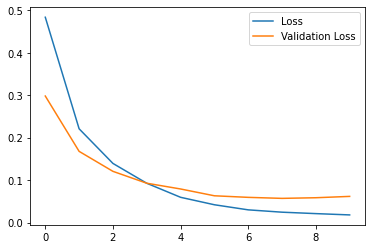

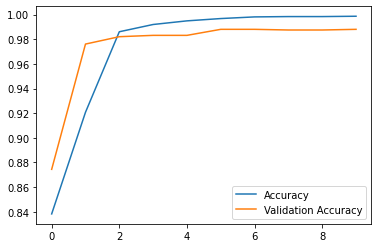

58/58 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9880
Accuracy: 0.9880369901657104


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(T,)),
    tf.keras.layers.Embedding(V + 1, D),
    tf.keras.layers.LSTM(M, return_sequences=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1, activation='sigmoid'),   
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

In [ ]:
labels = ['Ham', 'Spam']
p_test = np.rint(model.predict(X_test).flatten()).astype(np.int)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print(f'Sentence: {X_test_texts[i]}')
print(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')

Sentence: Not heard from U4 a while. Call me now am here all night with just my knickers on. Make me beg for it like U did last time 01223585236 XX Luv Nikiyu4.net
Truth: Spam Predicted: Ham
